Processamento de Linguagem Natural

## Bibliotecas

In [30]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [31]:
#Baixando os pacotes para trabalhar o spacy em português
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 25.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [32]:
pln = spacy.load('pt')
pln

In [33]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso no Rio de Janeiro.')

In [34]:
type(documento)

spacy.tokens.doc.Doc

In [35]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
no PROPN
Rio PROPN
de ADP
Janeiro PROPN
. PUNCT


# Lematização e stemização

In [36]:
#Lematização
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso cursar
no o
Rio Rio
de de
Janeiro Janeiro
. .


In [37]:
doc = pln("encontrei encontraram encontrarão cursei e cursando")
[token.lemma_ for token in doc]

['encontrar', 'encontrar', 'encontrar', 'cursar', 'e', 'cursar']

In [38]:
#Stemização (Radical)
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [39]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem("Aprender")

'aprend'

In [40]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso cursar curs
no o no
Rio Rio rio
de de de
Janeiro Janeiro jan
. . .


# Carregamento dos Textos

In [49]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [50]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"92658fa4-0e90-46c7-a29a-42560ddc1cf3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":61440060,"wgRevisionId":61440060,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros e

In [51]:
dados_html = bs.BeautifulSoup(dados, 'lxml') # Vai fazer a leitura do html separando em tag
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"92658fa4-0e90-46c7-a29a-42560ddc1cf3","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":61440060,"wgRevisionId":61440060,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 inglês-

In [52]:
# Extraimos só as tags <p>
paragrafos = dados_html.find_all('p')
len(paragrafos)

105

In [75]:
paragrafos[1]

<p><b>Inteligência artificial</b> (por vezes mencionada pela sigla em português <b>IA</b> ou pela sigla em inglês <b>AI</b> - <i>artificial intelligence</i>) é a <a href="/wiki/Intelig%C3%AAncia" title="Inteligência">inteligência</a> similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um <a href="/wiki/Agente_inteligente" title="Agente inteligente">agente inteligente</a> é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. <a href="/wiki/Andreas_Kaplan" title="Andreas Kaplan">Andreas Kaplan</a> e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.<sup class="reference" i

In [76]:
paragrafos[1].text

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [73]:
# Concatenando todos os textos
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [77]:
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

In [74]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

# Busca em texto com spaCy

In [78]:
pln = spacy.load('pt')
pln

In [81]:
string = 'turing'
token_pesquisa = pln(string)

In [82]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [83]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [85]:
doc[3044 -5 : 3045 + 5]

uma contribuição prática de alan turing foi o que se chamou

In [87]:
matches[0] # [id, inicio, fim]

(8661325627334373315, 3044, 3045)

In [94]:
from IPython.core.display import HTML
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)
texto = ""

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f'<p><strong>Resultados encontrados:</strong> {len(matches)}</p>'))

for i in matches:

  inicio = i[1] - numero_palavras

  if inicio < 0:
    inicio = 0

  texto += str(doc[inicio: i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"

display(HTML(f"""... {texto} ..."""))

# Extração de entidades nomeadas
 - NER (Named-Entity Recognition)
 - Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
 - Usado em chatbots para saber o assunto falado
 - Siglas: https://spacy.io/api/annotation#named-entities

In [99]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

In [97]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

# Nuvem de Palavras e stop words

In [107]:
#removendo stop words
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'conselho', 'vinda', 'nos', 'certamente', 'sétimo', 'terceiro', 'quarta', 'depois', 'fim', 'apontar', 'comprida', 'todas', 'tipo', 'só', 'de', 'que', 'teve', 'tempo', 'usar', 'vão', 'ter', 'onde', 'três', 'vós', 'na', 'porquanto', 'aquela', 'sabe', 'grandes', 'está', 'forma', 'aqueles', 'for', 'aos', 'caminho', 'novo', 'duas', 'puderam', 'valor', 'desse', 'até', 'estou', 'não', 'sistema', 'vindo', 'fazes', 'irá', 'essa', 'elas', 'ambos', 'dezoito', 'esteve', 'ou', 'muitos', 'quais', 'oitava', 'área', 'catorze', 'fazia', 'cedo', 'nossas', 'favor', 'aquelas', 'grupo', 'muito', 'mil', 'estás', 'quinta', 'coisa', 'ao', 'da', 'ademais', 'dos', 'baixo', 'corrente', 'nesta', 'nunca', 'te', 'tentaram', 'entre', 'minhas', 'para', 'quer', 'quanto', 'menor', 'estiveste', 'agora', 'dezasseis', 'sete', 'tão', 'aí', 'novas', 'tiveram', 'treze', 'as', 'ligado', 'fará', 'vai', 'usa', 'fazem', 'outra', 'vosso', 'maioria', 'apoia', 'nessa', 'porém', 'vêm', 'foste', 'segundo', 'um', 'des', 'fomos', 'vos

In [113]:
# transformando o texto em lista
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [112]:
# Tirando os stop_word
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [101]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [103]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = "White", max_words = 100, colormap= color_map)

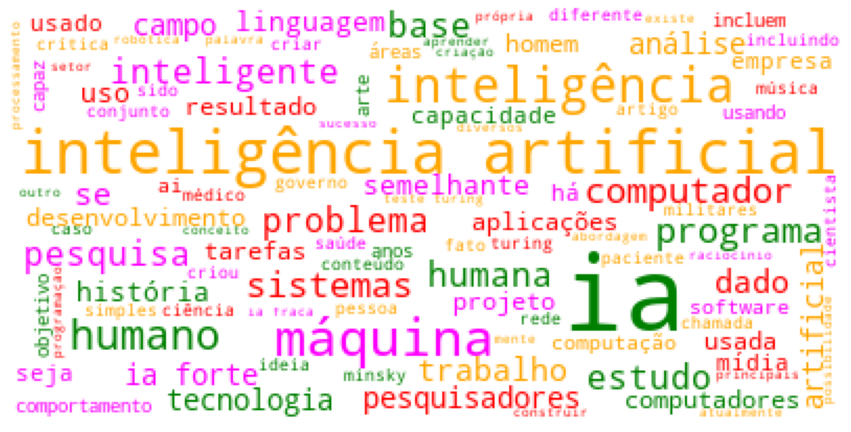

In [114]:
import matplotlib.pyplot as plt

cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()